# 1. intro

In [1]:
import seaborn as sns

tips = sns.load_dataset('tips')
tips.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Filter rows by smoker = no and total bill >= 10

In [2]:
tips[(tips['smoker'] == 'No') & (tips['total_bill'] >= 10)]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
235,10.07,1.25,Male,No,Sat,Dinner,2
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3
242,17.82,1.75,Male,No,Sat,Dinner,2


## What is the average total_bill for each value of smoker, day and time

In [3]:
a = tips.groupby(['smoker', 'day', 'time'])['total_bill'].mean().reset_index()

a.dropna(axis=0).reset_index()

,index,smoker,day,time,total_bill
0,0,Yes,Thur,Lunch,19.190588
1,2,Yes,Fri,Lunch,12.323333
2,3,Yes,Fri,Dinner,19.806667
3,5,Yes,Sat,Dinner,21.276667
4,7,Yes,Sun,Dinner,24.120000
5,8,No,Thur,Lunch,17.075227
6,9,No,Thur,Dinner,18.780000
7,10,No,Fri,Lunch,15.980000
8,11,No,Fri,Dinner,19.233333
9,13,No,Sat,Dinner,19.661778


In [4]:
tips.groupby('day')['total_bill'].mean()

day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64

In [5]:
tips.groupby('time')['total_bill'].mean()

time
Lunch     17.168676
Dinner    20.797159
Name: total_bill, dtype: float64

# 2. Tidy up

In [6]:
import pandas as pd

### Table 1 is a clean dataset

In [7]:
table1 = pd.read_csv('table1.csv')
table1

,country,year,cases,population
0,Afghanistan,1999,745,19987071
1,Afghanistan,2000,2666,20595360
2,Brazil,1999,37737,172006362
3,Brazil,2000,80488,174504898
4,China,1999,212258,1272915272
5,China,2000,213766,1280428583


In [8]:
table1.shape

(6, 4)

In [9]:
table1.dtypes

country       object
year           int64
cases          int64
population     int64
dtype: object

### Table 2 need to convert the 'type' column to 2 different columns

In [10]:
table2 = pd.read_csv('table2.csv')
table2.head()

,country,year,type,count
0,Afghanistan,1999,cases,745
1,Afghanistan,1999,population,19987071
2,Afghanistan,2000,cases,2666
3,Afghanistan,2000,population,20595360
4,Brazil,1999,cases,37737


In [11]:
table2.pivot_table(index =['country', 'year'], columns = 'type'
                   , values = 'count').reset_index()

type,country,year,cases,population
0,Afghanistan,1999,745,19987071
1,Afghanistan,2000,2666,20595360
2,Brazil,1999,37737,172006362
3,Brazil,2000,80488,174504898
4,China,1999,212258,1272915272
5,China,2000,213766,1280428583


### Table 3 split the 'rate' column to population and rate

In [12]:
table3 = pd.read_csv('table3.csv')
table3.head()

,country,year,rate
0,Afghanistan,1999,745/19987071
1,Afghanistan,2000,2666/20595360
2,Brazil,1999,37737/172006362
3,Brazil,2000,80488/174504898
4,China,1999,212258/1272915272


In [13]:
table3['cases'] = table3['rate'].str.split('/').str.get(0)
table3['population'] = table3['rate'].str.split('/').str.get(1)

In [14]:
table3

,country,year,rate,cases,population
0,Afghanistan,1999,745/19987071,745,19987071
1,Afghanistan,2000,2666/20595360,2666,20595360
2,Brazil,1999,37737/172006362,37737,172006362
3,Brazil,2000,80488/174504898,80488,174504898
4,China,1999,212258/1272915272,212258,1272915272
5,China,2000,213766/1280428583,213766,1280428583


# 3. Apply method

In [15]:
table3.head()

,country,year,rate,cases,population
0,Afghanistan,1999,745/19987071,745,19987071
1,Afghanistan,2000,2666/20595360,2666,20595360
2,Brazil,1999,37737/172006362,37737,172006362
3,Brazil,2000,80488/174504898,80488,174504898
4,China,1999,212258/1272915272,212258,1272915272


### Write a function that takes a value of rate and parses out the total population

In [16]:
def parse_population(values_rate):
        return values_rate.str.split('/').str.get(1)

In [17]:
pd.to_numeric(parse_population(table3['rate']))

0      19987071
1      20595360
2     172006362
3     174504898
4    1272915272
5    1280428583
Name: rate, dtype: int64

### alternatively

In [18]:
def parse_population(values_rate):
        return int(values_rate.split('/')[1])

In [19]:
table3.rate[0]

'745/19987071'

In [20]:
assert parse_population('111/222') == 222

In [21]:
table3.rate.apply(parse_population)

0      19987071
1      20595360
2     172006362
3     174504898
4    1272915272
5    1280428583
Name: rate, dtype: int64

### set a new pop column

In [22]:
table3['new_population'] = table3.rate.apply(parse_population)

In [23]:
table3

,country,year,rate,cases,population,new_population
0,Afghanistan,1999,745/19987071,745,19987071,19987071
1,Afghanistan,2000,2666/20595360,2666,20595360,20595360
2,Brazil,1999,37737/172006362,37737,172006362,172006362
3,Brazil,2000,80488/174504898,80488,174504898,174504898
4,China,1999,212258/1272915272,212258,1272915272,1272915272
5,China,2000,213766/1280428583,213766,1280428583,1280428583


# 4. Plot

### import titanic dataset

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### plot the 2 axes figure with one  as fare distribution and other as boxplot on class and fare 

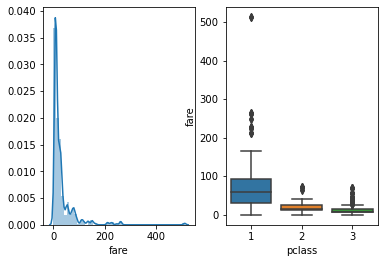

In [26]:
fig, (ax1,ax2) = plt.subplots(1,2)

sns.distplot(titanic.fare, ax =ax1)
sns.boxplot(x='pclass', y ='fare', data = titanic, ax = ax2)

# 5. Models

### Load titanic dataset

In [27]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [28]:
titanic.info()

# as we can see it contains object category and many missing datas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 63.0+ KB


### Subset survived, class, who

In [29]:
titanic_subset = titanic[['survived', 'class', 'who']]
titanic_subset.head()

,survived,class,who
0,0,Third,man
1,1,First,woman
2,1,Third,woman
3,1,First,woman
4,0,Third,man


### convert it to dummies dataset

In [30]:
import pandas as pd
import seaborn as sns
from sklearn import linear_model

In [31]:
titanic_dummy = pd.get_dummies(titanic_subset, drop_first = True)
titanic_dummy.head()

,survived,class_Second,class_Third,who_man,who_woman
0,0,0,1,1,0
1,1,0,0,0,1
2,1,0,1,0,1
3,1,0,0,0,1
4,0,0,1,1,0


### Fitted to the logistic regression on survived (since all binary)

In [32]:
X = titanic_dummy.iloc[:,1:]
X.head()

,class_Second,class_Third,who_man,who_woman
0,0,1,1,0
1,0,0,0,1
2,0,1,0,1
3,0,0,0,1
4,0,1,1,0


In [33]:
y = titanic_dummy.survived

In [34]:
clf = linear_model.LogisticRegression(random_state = 0, solver = 'lbfgs', multi_class= 'multinomial').fit(X,y)

In [35]:
clf.coef_

array([[-0.46549873, -1.01898083, -1.23823732,  0.20337229]])

In [36]:
# for each woman there is better chance to survive